# 🎲 Demostración del TCL con Dados

Este notebook demuestra el **Teorema Central del Límite (TCL)** de una manera clásica: tirando dados.

La idea es simple:
1.  La distribución de resultados al tirar **un solo dado** es **uniforme**. Cada cara (del 1 al 6) tiene la misma probabilidad de salir.
2.  Sin embargo, si tiramos **varios dados a la vez y sumamos sus resultados**, la distribución de esas sumas comenzará a parecerse a una **distribución normal** (una campana de Gauss).

Vamos a simular este proceso para visualizarlo.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Estilo para los gráficos
sns.set_theme(style="whitegrid")

## Paso 1: Distribución de un Solo Dado

Primero, vamos a simular una gran cantidad de tiradas de un único dado para confirmar que su distribución es, en efecto, uniforme. Cada resultado (1, 2, 3, 4, 5, 6) debería aparecer un número similar de veces.

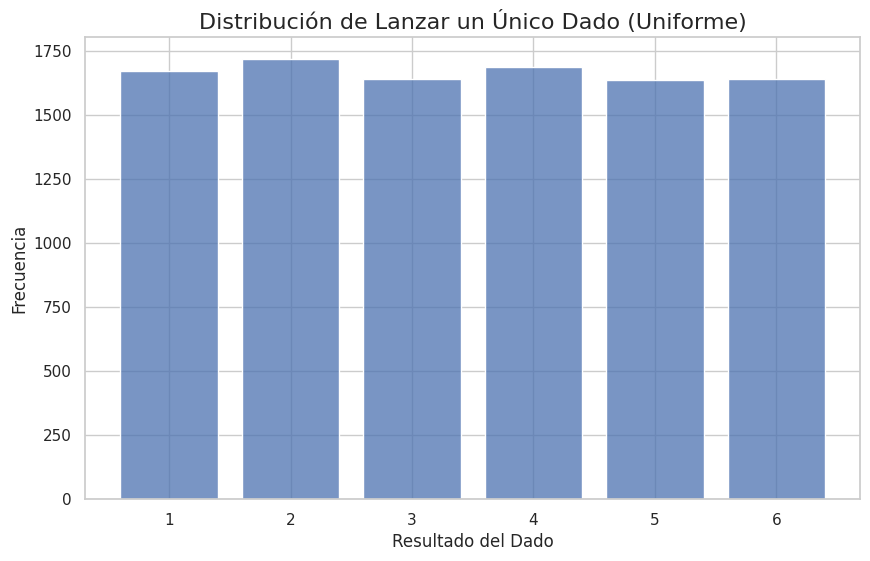

In [7]:
# Parámetros de la simulación
n_lanzamientos_un_dado = 10000

# Simulamos las tiradas
resultados_un_dado = np.random.randint(1, 7, size=n_lanzamientos_un_dado)

# Visualizamos la distribución
plt.figure(figsize=(10, 6))
sns.histplot(resultados_un_dado, bins=np.arange(1, 8)-0.5, discrete=True, shrink=0.8)
plt.title('Distribución de Lanzar un Único Dado (Uniforme)', fontsize=16)
plt.xlabel('Resultado del Dado')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 7))
plt.show()

## Paso 2: Simular la Suma de Múltiples Dados

Ahora viene la parte central del experimento. Vamos a simular el proceso de lanzar **seis dados** a la vez y **sumar sus puntuaciones**. Repetiremos este proceso miles de veces para generar una distribución de las sumas.

-   La suma mínima posible es 6 (seis 1s).
-   La suma máxima posible es 36 (seis 6s).
-   Los valores intermedios (como 21) son mucho más probables, ya que hay muchas más combinaciones de dados que los producen.

In [8]:
# Parámetros de la simulación
n_dados = 6
n_experimentos = 20000 # Número de veces que lanzamos los 6 dados

# Lista para almacenar las sumas de cada experimento
sumas = []

# Bucle para realizar los experimentos
for _ in range(n_experimentos):
    # Lanzamos n_dados y obtenemos sus resultados
    lanzamientos = np.random.randint(1, 7, size=n_dados)
    # Sumamos los resultados y los guardamos
    suma_total = np.sum(lanzamientos)
    sumas.append(suma_total)

# Convertimos la lista a un array de numpy
sumas = np.array(sumas)

## Paso 3: Visualizar el Resultado

Ahora, vamos a crear un histograma de todas las sumas que hemos recolectado. Si el Teorema Central del Límite es correcto, esta distribución debería parecerse mucho a una campana de Gauss, aunque el proceso subyacente (lanzar un dado) era uniforme.

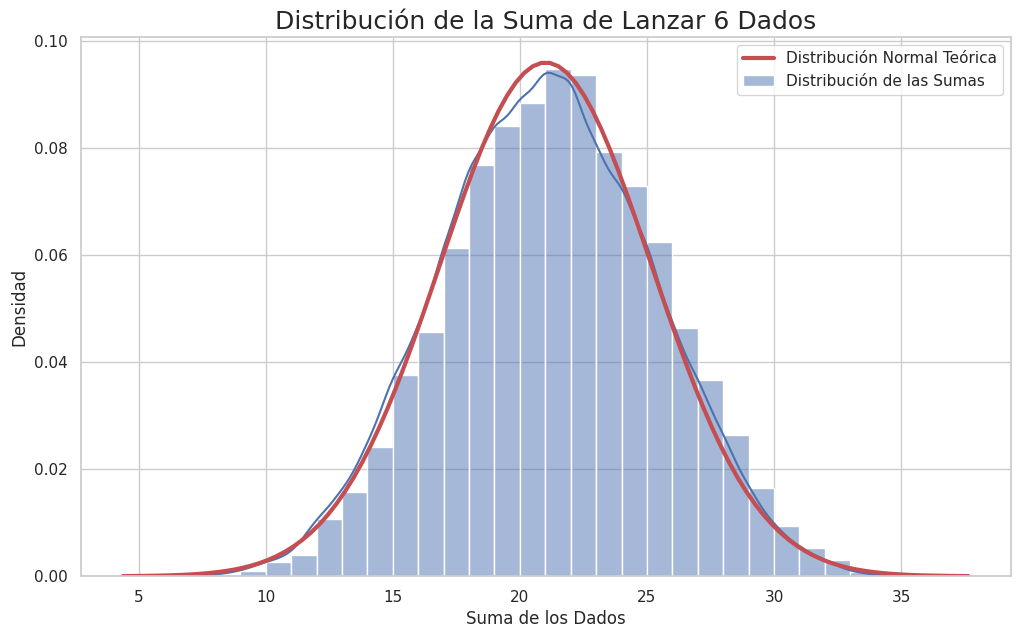

Media de las sumas: 21.01
Desviación estándar de las sumas: 4.16


In [9]:
# Visualizamos la distribución de las sumas
plt.figure(figsize=(12, 7))
sns.histplot(sumas, bins=range(n_dados, n_dados*6 + 2), kde=True, stat="density", label='Distribución de las Sumas')

# Superponemos la curva normal teórica para comparar
mu = np.mean(sumas)
sigma = np.std(sumas)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
pdf = norm.pdf(x, mu, sigma)

plt.plot(x, pdf, 'r-', linewidth=3, label='Distribución Normal Teórica')

plt.title(f'Distribución de la Suma de Lanzar {n_dados} Dados', fontsize=18)
plt.xlabel('Suma de los Dados')
plt.ylabel('Densidad')
plt.legend()
plt.show()

print(f"Media de las sumas: {mu:.2f}")
print(f"Desviación estándar de las sumas: {sigma:.2f}")

## Conclusiones 💡

El resultado es claro:
-   El primer gráfico muestra una **distribución uniforme**, como era de esperar para un solo dado.
-   El segundo gráfico muestra una hermosa **distribución normal** (una campana de Gauss) para la suma de los seis dados.

Esto demuestra perfectamente el Teorema Central del Límite. Aunque los eventos individuales son uniformes, la suma de muchos de estos eventos independientes y distribuidos de manera idéntica converge hacia una distribución normal. Esta es la razón por la que la distribución normal aparece tan a menudo en la naturaleza y la estadística.

# 📊 Demostración del Teorema Central del Límite (TCL)

El **Teorema Central del Límite** es uno de los conceptos más importantes en estadística. Nos dice que, bajo ciertas condiciones, la distribución de las medias de una gran cantidad de muestras aleatorias **tenderá a ser una distribución normal**, sin importar cuál sea la forma de la distribución original de la población.

**En resumen:**
1.  **Elige cualquier distribución de probabilidad**, no tiene que ser normal (puede ser uniforme, exponencial, etc.).
2.  **Toma múltiples muestras** de esa población, todas del mismo tamaño (`n`).
3.  **Calcula la media** de cada una de esas muestras.
4.  La **distribución de todas esas medias muestrales** se aproximará a una campana de Gauss (una distribución normal).

Este notebook demostrará este fenómeno visualmente.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Estilo para los gráficos
sns.set_theme(style="whitegrid")

## Paso 1: Crear nuestra Población de Partida

Para demostrar el poder del TCL, comenzaremos con una población que **claramente no es normal**. Usaremos una **distribución exponencial**, que está muy sesgada hacia la izquierda. Esta podría representar, por ejemplo, el tiempo de espera entre clientes en un servicio.

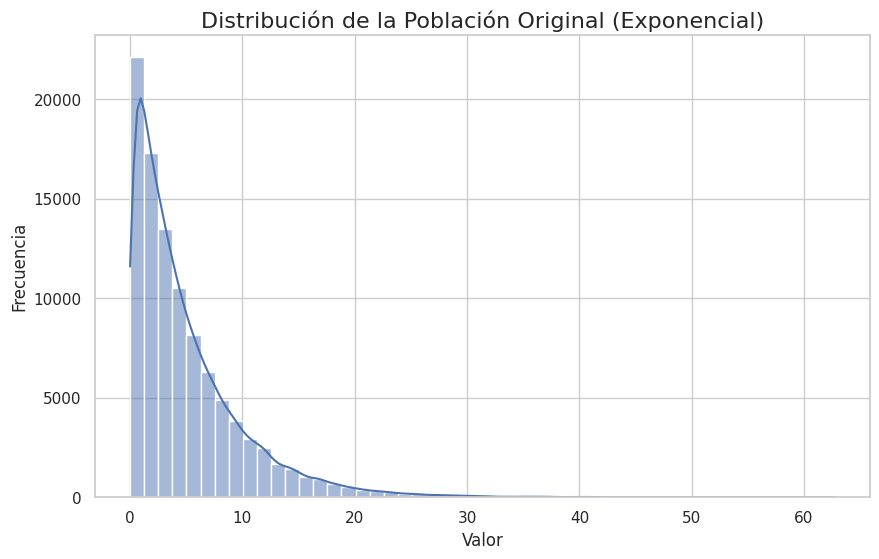

Media de la población: 5.01
Desviación estándar de la población: 5.02


In [11]:
# Parámetros de la población
population_size = 100000
# Usamos una distribución exponencial (claramente no normal)
# El parámetro 'scale' es el inverso de la tasa (lambda)
# np.random.exponential(scale=2, size=population_size) también funciona
population = np.random.exponential(scale=5, size=population_size)

# Visualizamos la distribución de nuestra población
plt.figure(figsize=(10, 6))
sns.histplot(population, bins=50, kde=True)
plt.title('Distribución de la Población Original (Exponencial)', fontsize=16)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

print(f"Media de la población: {np.mean(population):.2f}")
print(f"Desviación estándar de la población: {np.std(population):.2f}")

## Paso 2: Tomar Muestras y Calcular sus Medias

Ahora simularemos el proceso de tomar un gran número de muestras de nuestra población. Para cada muestra, calcularemos su media. Repetiremos este proceso miles de veces.

Definiremos dos parámetros clave:
-   `sample_size`: El tamaño de cada muestra individual (cuántas personas medimos cada vez).
-   `n_samples`: El número total de muestras que tomaremos.

In [12]:
# Parámetros de la simulación
sample_size = 40  # Tamaño de cada muestra
n_samples = 2000    # Número de muestras a tomar

# Lista para almacenar las medias de cada muestra
sample_means = []

# Bucle para realizar el muestreo
for _ in range(n_samples):
    # Tomamos una muestra aleatoria de la población
    sample = np.random.choice(population, size=sample_size)
    # Calculamos su media y la guardamos
    sample_means.append(np.mean(sample))

# Convertimos la lista a un array de numpy para facilitar los cálculos
sample_means = np.array(sample_means)

## Paso 3: Visualizar la Distribución de las Medias Muestrales

Este es el momento de la verdad. Según el Teorema Central del Límite, el histograma de `sample_means` debería parecerse a una distribución normal, a pesar de que nuestra población original era exponencial y sesgada.

Para confirmarlo, superpondremos una curva de densidad normal teórica sobre nuestro histograma.

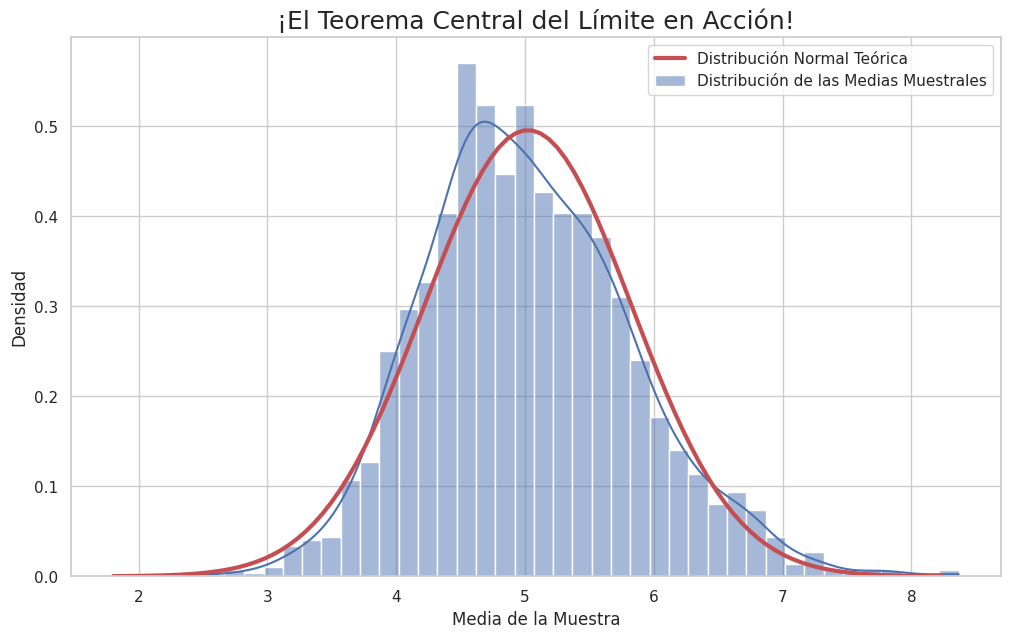

Media de las medias muestrales: 5.02
Media teórica (media de la población): 5.01

Desviación estándar de las medias muestrales (Error Estándar): 0.81
Error Estándar Teórico (σ/√n): 0.79


In [13]:
# Visualizamos la distribución de las medias muestrales
plt.figure(figsize=(12, 7))
sns.histplot(sample_means, bins=40, kde=True, stat="density", label='Distribución de las Medias Muestrales')

# Superponemos la curva normal teórica
# Media y desviación estándar de las medias muestrales
mu = np.mean(sample_means)
sigma = np.std(sample_means)

# Creamos un rango de valores para la curva normal
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
# Calculamos la densidad de probabilidad para esos valores
pdf = norm.pdf(x, mu, sigma)

plt.plot(x, pdf, 'r-', linewidth=3, label='Distribución Normal Teórica')

plt.title('¡El Teorema Central del Límite en Acción!', fontsize=18)
plt.xlabel('Media de la Muestra')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Verificación de los parámetros teóricos del TCL
print(f"Media de las medias muestrales: {mu:.2f}")
print(f"Media teórica (media de la población): {np.mean(population):.2f}\n")

print(f"Desviación estándar de las medias muestrales (Error Estándar): {sigma:.2f}")
std_error_teorico = np.std(population) / np.sqrt(sample_size)
print(f"Error Estándar Teórico (σ/√n): {std_error_teorico:.2f}")

## Conclusiones 💡

Como se puede observar en el último gráfico, la distribución de las medias de las muestras (`sample_means`) sigue una **perfecta forma de campana**, a pesar de que la población original tenía una forma completamente diferente (exponencial).

Además, se cumplen las dos propiedades principales del TCL:

1.  La **media de las medias muestrales** es prácticamente igual a la **media de la población original**.
2.  La **desviación estándar de las medias muestrales** (conocida como **Error Estándar**) es igual a la desviación estándar de la población dividida por la raíz cuadrada del tamaño de la muestra (`σ/√n`).

Este experimento demuestra visualmente por qué el Teorema Central del Límite es tan fundamental para la inferencia estadística y las pruebas de hipótesis.